## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata_df, study_results_df, how= 'outer', on= "Mouse ID")

# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
combined_mice_df = combined_mice_df.rename(columns={"Age_months": "Age Months"})
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_mice_df["Mouse ID"].count()

1893

In [5]:
mouse_id = combined_mice_df["Mouse ID"].unique()
mouse_id

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [6]:
combined_mice_df["Mouse ID"].drop_duplicates().count()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_df = combined_mice_df[combined_mice_df[["Mouse ID", "Timepoint"]].duplicated() ==True]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_mice_df.loc[combined_mice_df["Mouse ID"] =="g989", :]
g989


,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_mice_df = combined_mice_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")
new_combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame
new_combined_mice_df["Mouse ID"].count()

1888

In [11]:
new_mice_count = new_combined_mice_df["Mouse ID"].drop_duplicates().count()
new_mice_count

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [13]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
avg_tumor_volume_df = tumor_volume_df.mean()
Average_tumor_volume = pd.DataFrame(avg_tumor_volume_df)
Average_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [14]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
med_tumor_volume_df = tumor_volume_df.median()
Median_tumor_volume = pd.DataFrame(med_tumor_volume_df)
Median_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [15]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
var_tumor_volume_df = tumor_volume_df.var()
variance_tumor_volume = pd.DataFrame(var_tumor_volume_df)
variance_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [16]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
std_tumor_volume_df = tumor_volume_df.std()
stdeviation_tumor_volume = pd.DataFrame(std_tumor_volume_df)
stdeviation_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [17]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
sem_tumor_volume_df = tumor_volume_df.sem()
stderror_tumor_volume = pd.DataFrame(sem_tumor_volume_df)
stderror_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [18]:
Drug_Regimen_Stats = pd.DataFrame({"Mean": avg_tumor_volume_df,
                                   "Median": med_tumor_volume_df,
                                   "Variance": var_tumor_volume_df,
                                   "Standard Deviation": std_tumor_volume_df,
                                   "SEM": sem_tumor_volume_df})
Drug_Regimen_Stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_volume_df2 = new_combined_mice_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_volume_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

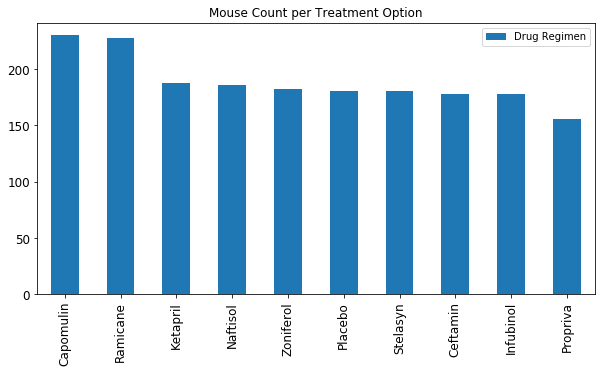

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count_per_drug = new_combined_mice_df["Drug Regimen"].value_counts()
mouse_count_per_drug.plot(kind= "bar",title ="Mouse Count per Treatment Option",
                                                 figsize=(10,5), legend=True, fontsize=12)
plt.show()

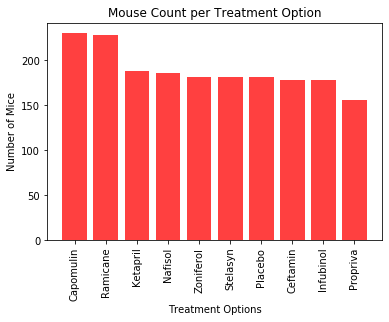

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = ("Capomulin", "Ramicane", "Ketapril", "Nafisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva")
x_axis = np.arange(len(mouse_count_per_drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
                   
plt.title("Mouse Count per Treatment Option")
plt.xlabel("Treatment Options")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mouse_count_per_drug, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.show()
plt.tight_layout()

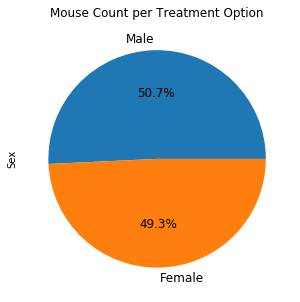

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = new_combined_mice_df["Sex"].value_counts()
gender_count.plot(kind= "pie",title ="Mouse Count per Treatment Option", autopct="%1.1f%%",
                                                 figsize=(5,5), fontsize=12)
plt.show()

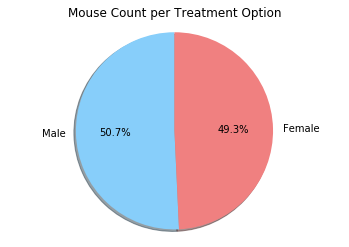

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
colors = ["lightskyblue", "lightcoral"]
plt.title("Mouse Count per Treatment Option")
plt.pie(gender_count, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [36]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = new_combined_mice_df.groupby(["Mouse ID"])["Timepoint"].last()
last_tumor_vol = new_combined_mice_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
last_chemo_drug = new_combined_mice_df.groupby(["Mouse ID"])["Drug Regimen"].last()


In [37]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_combined_mice_df = pd.merge(last_timepoint, last_tumor_vol, how= "left", on= ["Mouse ID"])
last_combined_mice_complete = pd.merge(last_combined_mice_df, last_chemo_drug, how= "left", on= ["Mouse ID"])
last_combined_mice_complete


,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
a203,45,67.973419,Infubinol
a251,45,65.525743,Infubinol
a262,45,70.717621,Placebo
a275,45,62.999356,Ceftamin
a366,30,63.440686,Stelasyn
...,...,...,...
z435,10,48.710661,Propriva
z578,45,30.638696,Ramicane
z581,45,62.754451,Infubinol


In [38]:
last_combined_mice_complete_df = last_combined_mice_complete.sort_values(["Drug Regimen", "Tumor Volume (mm3)"])
last_combined_mice_complete_df

,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
s185,45,23.343598,Capomulin
m601,45,28.430964,Capomulin
x401,45,28.484033,Capomulin
f966,20,30.485985,Capomulin
u364,45,31.023923,Capomulin
...,...,...,...
g296,45,68.163195,Zoniferol
w575,45,68.401286,Zoniferol
q511,45,68.611061,Zoniferol


In [39]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [48]:
# Put treatments into a list for for loop (and later for plot labels)
tx = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for Capomulin in tx:
    final_tumor_vol = last_combined_mice_complete_df.loc[last_combined_mice_complete_df['Drug Regimen'] == Capomulin, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    print(tumor_vol_list)


[Mouse ID
s185    23.343598
m601    28.430964
x401    28.484033
f966    30.485985
u364    31.023923
y793    31.896238
r554    32.377357
m957    33.329098
t565    34.455298
w914    36.041047
g288    37.074024
i738    37.311846
j119    38.125164
j246    38.753265
l897    38.846876
b742    38.939633
b128    38.982878
w150    39.952347
g316    40.159220
v923    40.658124
s710    40.728578
l509    41.483008
r944    41.581521
r157    46.539206
i557    47.685963
Name: Tumor Volume (mm3), dtype: float64]
[Mouse ID
s185    23.343598
m601    28.430964
x401    28.484033
f966    30.485985
u364    31.023923
y793    31.896238
r554    32.377357
m957    33.329098
t565    34.455298
w914    36.041047
g288    37.074024
i738    37.311846
j119    38.125164
j246    38.753265
l897    38.846876
b742    38.939633
b128    38.982878
w150    39.952347
g316    40.159220
v923    40.658124
s710    40.728578
l509    41.483008
r944    41.581521
r157    46.539206
i557    47.685963
Name: Tumor Volume (mm3), dtype: float

In [30]:
Capomulin_df = new_combined_mice_df.loc[new_combined_mice_df["Drug Regimen"] =="Capomulin", :]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [31]:
Ramicane_df = new_combined_mice_df.loc[new_combined_mice_df["Drug Regimen"] =="Ramicane", :]
Ramicane_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [32]:
Infubinol_df = new_combined_mice_df.loc[new_combined_mice_df["Drug Regimen"] =="Infubinol", :]
Infubinol_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [33]:
Ceftamin_df = new_combined_mice_df.loc[new_combined_mice_df["Drug Regimen"] =="Ceftamin", :]
Ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [35]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

NameError: name 'volume' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
last_combined_mice_complete_df = pd.DataFrame(np.random.rand(200, 2), columns=["Tumor Volume (mm3)", "Timepoint"])
last_combined_mice_complete_df.plot.box()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
chemo_drug = new_combined_mice_df["Drug Regimen"].unique()
chemo_drug

In [ ]:
y793 = Capomulin_df.loc[Capomulin_df["Mouse ID"] =="y793", :]
y793

In [ ]:
tum_vol_max = y793.max()
tum_vol_max

In [ ]:
tum_vol_min = y793.min()
tum_vol_min

In [ ]:
x_axis = np.arange(0, 50, 5)
x_axis

In [ ]:
y_axis = [45.00, 41.02, 41.63, 42.28, 40.72, 38.99, 35.72, 36.33, 31.48, 31.90]
y_axis

In [ ]:
tumor_vol_y793 = plt.plot(x_axis, y_axis, color="red", label="Tumor Volume")
plt.figure(figsize = (10,5))
plt.title("Tumor Volume for Mouse ID y793 on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 50)
plt.ylim(30, 50)
plt.grid()
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#groupby mouse id
#loop thru tx
#appendd array

In [ ]:
x_axis = np.arange(0, 45, 5)
Timepoin = []
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
